# 10-7. 프로젝트: 인물 모드 문제점 찾기

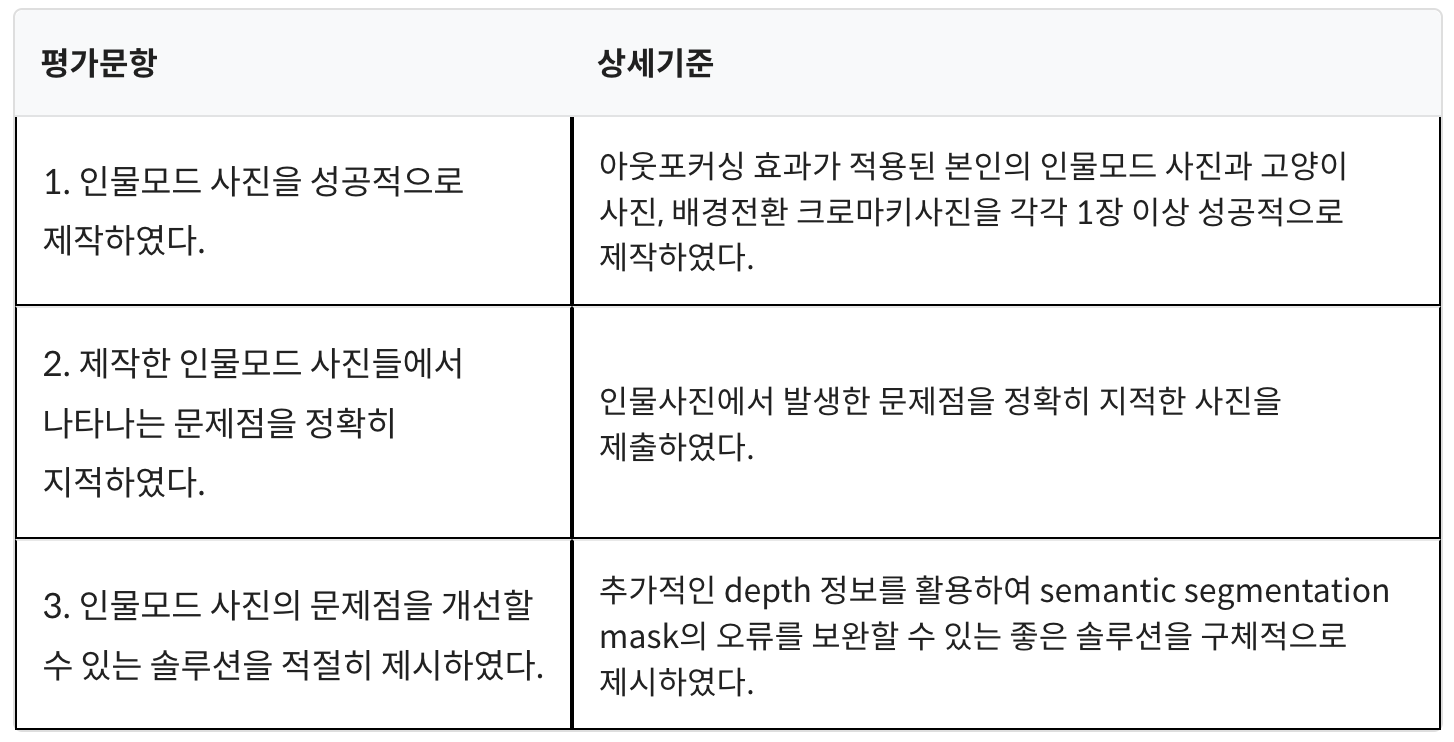

# Step 1. 인물모드 직접 해 보기

- 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
- 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
- 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

## 1) 사진1

In [ ]:
!pip install Tensorflow==2.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 16 kB/s 
     |████████████████████████████████| 132 kB 68.3 MB/s 
     |████████████████████████████████| 1.2 MB 46.7 MB/s 
     |████████████████████████████████| 4.0 MB 26.3 MB/s 
     |████████████████████████████████| 14.8 MB 50.9 MB/s 
     |████████████████████████████████| 462 kB 55.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68716 sha256=f331ce8f53cf3da2cd03b5da24596739e89fdf55e4f15c4bcdc1385c5d458508
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: n

In [ ]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [ ]:
!pip3 install pixellib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 430 kB 8.7 MB/s 
     |████████████████████████████████| 151 kB 45.9 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 1.4 MB 53.9 MB/s 
     |████████████████████████████████| 50 kB 5.2 MB/s 
     |████████████████████████████████| 8.3 MB 25.3 MB/s 
     |████████████████████████████████| 96 kB 5.7 MB/s 
     |████████████████████████████████| 843 kB 57.9 MB/s 
     |████████████████████████████████| 596 kB 60.2 MB/s 
     |████████████████████████████████| 117 kB 61.8 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 87 kB 7.2 MB/s 
     |████████████████████████████████| 3.1 MB 39.9 MB/s 
     |████████████████████████████████| 60.5 MB 74 kB/s 
     |████████████████████████████████| 59.9 

(661, 560, 3)


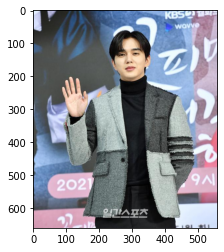

In [ ]:
img_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 10/teset.jpeg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 저장할 파일 이름을 결정합니다
model_dir = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 10'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 10/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f284d285b10>)

In [ ]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [ ]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [ ]:
!pip install -U pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

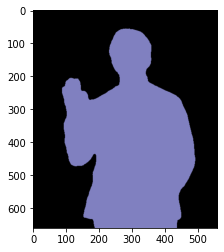

In [ ]:
plt.imshow(output)
plt.show()

In [ ]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [ ]:
segvalues['class_ids']

array([ 0, 15])

In [ ]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [ ]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [ ]:
colormap[15]

array([192, 128, 128])

In [ ]:
seg_color = (128,128,192)

(661, 560)


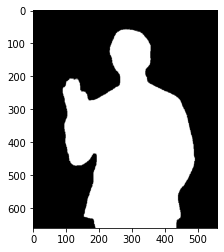

In [ ]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

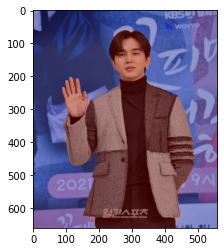

In [ ]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

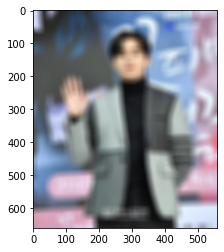

In [ ]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (25,25))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

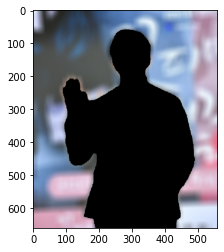

In [ ]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

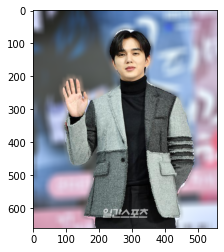

In [ ]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 2) 사진2

(1080, 672, 3)


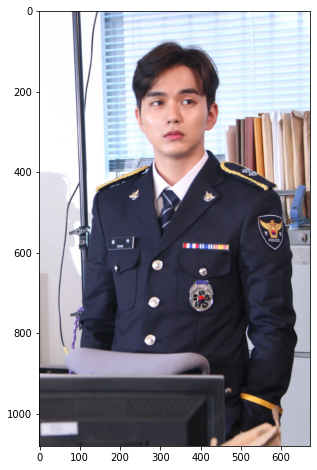

In [ ]:
# 이미지 불러오기
img_path1 = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 10/test1.png'  
img_orig1 = cv2.imread(img_path1) 

print(img_orig1.shape)
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()

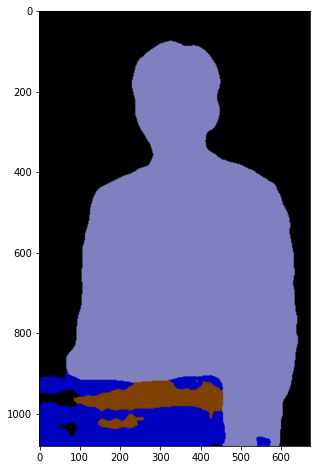

In [ ]:
# segmentation 실행
segvalues1, output1 = model.segmentAsPascalvoc(img_path1)
plt.figure(figsize=(10,8))
plt.imshow(output1)
plt.show()

In [ ]:
for class_id in segvalues1['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
tv


(1080, 672)


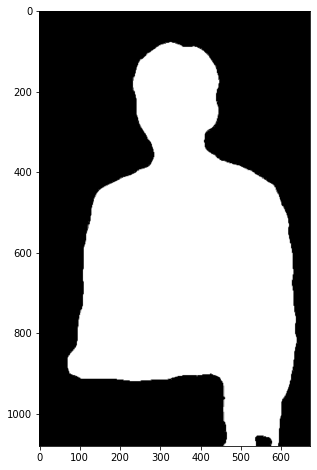

In [ ]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map1 = np.all(output1==seg_color, axis=-1)
print(seg_map1.shape)
plt.figure(figsize=(10,8))
plt.imshow(seg_map1, cmap='gray')
plt.show()

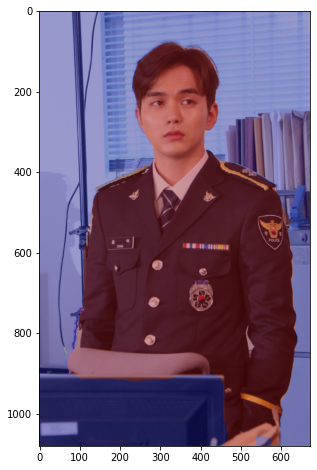

In [ ]:
img_show1 = img_orig1.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask1 = seg_map1.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show1 = cv2.addWeighted(img_show1, 0.6, color_mask1, 0.4, 0.0)
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

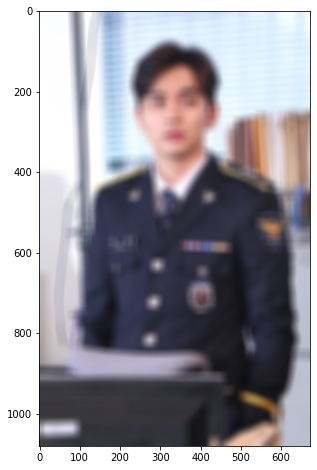

In [ ]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur1 = cv2.blur(img_orig1, (25,25))
plt.figure(figsize=(10,8))  
plt.imshow(cv2.cvtColor(img_orig_blur1, cv2.COLOR_BGR2RGB))
plt.show()

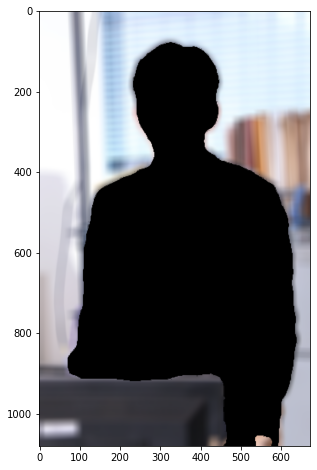

In [ ]:
img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
img_bg_blur1 = cv2.bitwise_and(img_orig_blur1, img_bg_mask1)
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img_bg_blur1, cv2.COLOR_BGR2RGB))
plt.show()

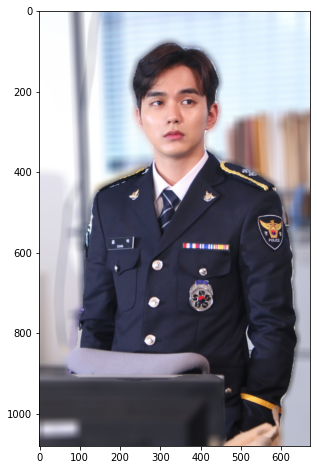

In [ ]:
img_concat1 = np.where(img_mask_color1==255, img_orig1, img_bg_blur1)
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def human_bg_blur(img_path, kernel):
  img_orig1 = cv2.imread(img_path) 
  segvalues1, output1 = model.segmentAsPascalvoc(img_path)
  
  seg_map1 = np.all(output1==seg_color, axis=-1)

  img_show1 = img_orig1.copy()
  img_mask1 = seg_map1.astype(np.uint8) * 255
  color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
  img_show1 = cv2.addWeighted(img_show1, 0.6, color_mask1, 0.4, 0.0)  
  img_orig_blur1 = cv2.blur(img_orig1, (kernel,kernel))

  img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
  img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
  img_bg_blur1 = cv2.bitwise_and(img_orig_blur1, img_bg_mask1)

  img_concat1 = np.where(img_mask_color1==255, img_orig1, img_bg_blur1)
  plt.figure(figsize=(20,16))
  plt.subplot(221)
  plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
  plt.subplot(222)
  plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
  plt.show()



## 3) 사진3

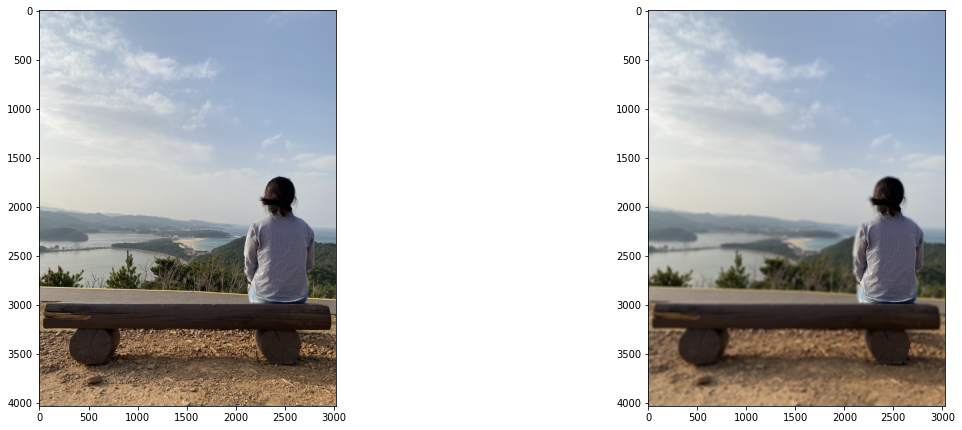

In [ ]:
# 이미지 불러오기
img_path2 = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 10/IMG_0569.jpg'  
human_bg_blur(img_path2, 30)

## 4) 사진4


In [ ]:
LABEL_NAMES

['background',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tv']

In [ ]:
tuple(reversed(colormap[8]))

(0, 0, 64)

In [ ]:
def bg_blur(labelnumber, img_path, kernel):
  img_orig1 = cv2.imread(img_path) 
  segvalues1, output1 = model.segmentAsPascalvoc(img_path)
  seg_color = tuple(reversed(colormap[labelnumber]))
  seg_map1 = np.all(output1==seg_color, axis=-1)

  img_show1 = img_orig1.copy()
  img_mask1 = seg_map1.astype(np.uint8) * 255
  color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
  img_show1 = cv2.addWeighted(img_show1, 0.6, color_mask1, 0.4, 0.0)  
  img_orig_blur1 = cv2.blur(img_orig1, (kernel,kernel))

  img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
  img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
  img_bg_blur1 = cv2.bitwise_and(img_orig_blur1, img_bg_mask1)

  img_concat1 = np.where(img_mask_color1==255, img_orig1, img_bg_blur1)
  plt.figure(figsize=(20,16))
  plt.subplot(221)
  plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
  plt.subplot(222)
  plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
  plt.show()


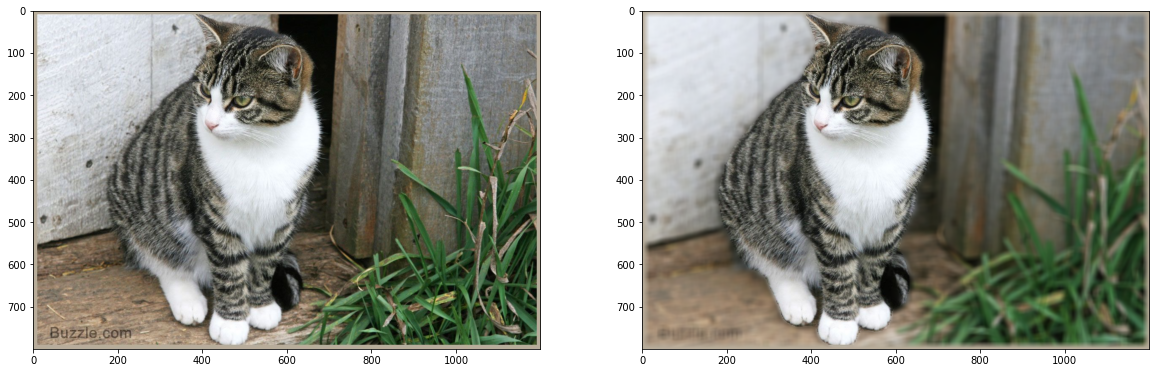

In [ ]:
cat_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 10/cat.jpeg'
bg_blur(8,cat_path,15)

## 5) 사진5

In [ ]:
def bg_mani(labelnumber, img_path, bg_path, kernel):
  img_orig1 = cv2.imread(img_path) 
  bg_orig = cv2.imread(bg_path)
  bg_orig = cv2.resize(bg_orig, (img_orig1.shape[1], img_orig1.shape[0]))
  segvalues1, output1 = model.segmentAsPascalvoc(img_path)
  seg_color = tuple(reversed(colormap[labelnumber]))
  seg_map1 = np.all(output1==seg_color, axis=-1)

  img_show1 = img_orig1.copy()
  img_mask1 = seg_map1.astype(np.uint8) * 255
  color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
  # bg_orig = cv2.addWeighted(bg_orig, 0.6, color_mask1, 0.4, 0.0)  
  img_orig_blur1 = cv2.blur(bg_orig, (kernel,kernel))

  img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
  img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
  img_bg_blur1 = cv2.bitwise_and(img_orig_blur1, img_bg_mask1)

  img_concat1 = np.where(img_mask_color1==255, img_orig1, img_bg_blur1)
  plt.figure(figsize=(20,16))
  plt.subplot(221)
  plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
  plt.subplot(222)
  plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
  plt.show()


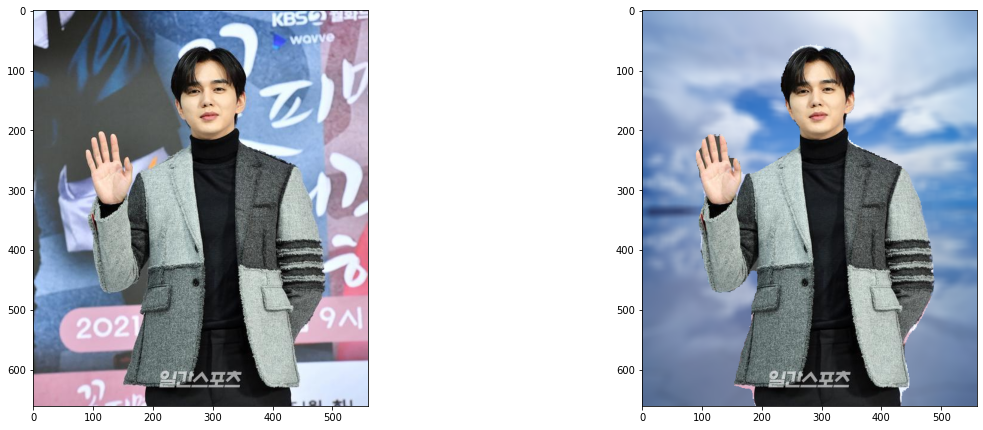

In [ ]:
bg_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 10/bg1.jpeg'
bg_mani(15, img_path, bg_path, 15)

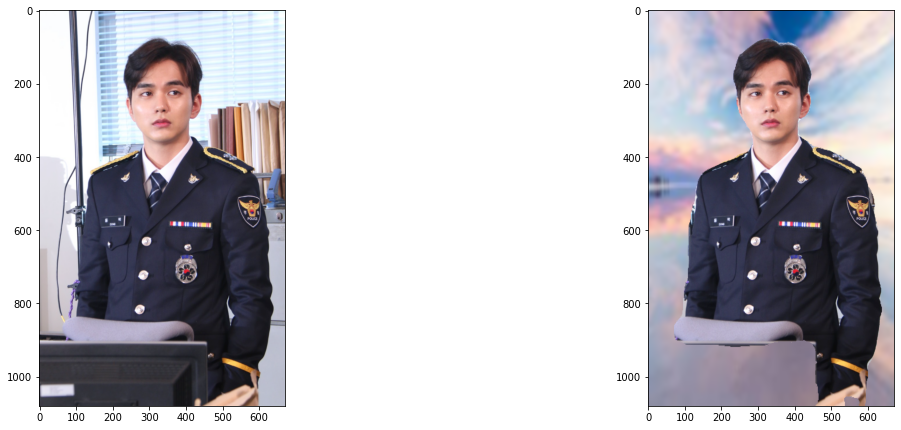

In [ ]:
bg_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 10/bg.jpeg'
bg_mani(15, img_path1, bg_path, 15)

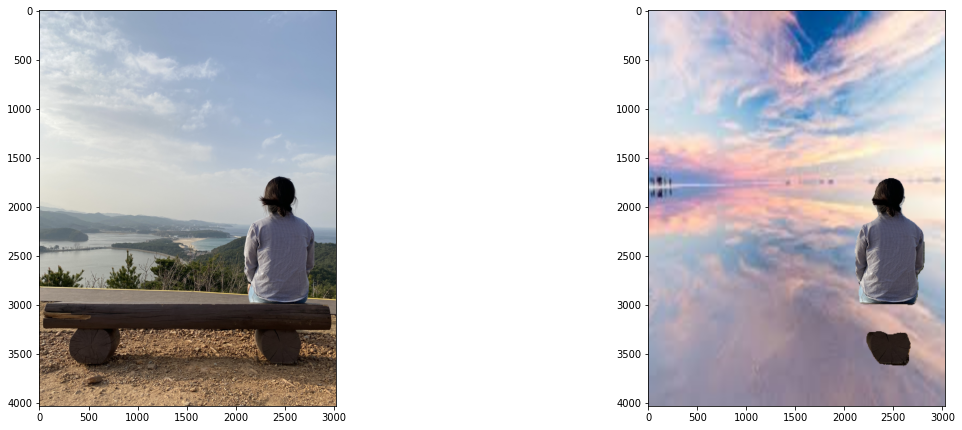

In [ ]:
bg_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 10/bg.jpeg'
bg_mani(15, img_path2, bg_path, 15)

## Step 2. 사진에서 문제점 찾기

- 추가로 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 아래 사진처럼 표시해 봅시다. 표시한 이미지들을 jupyter notebook에 포함하여 제출해 주세요.



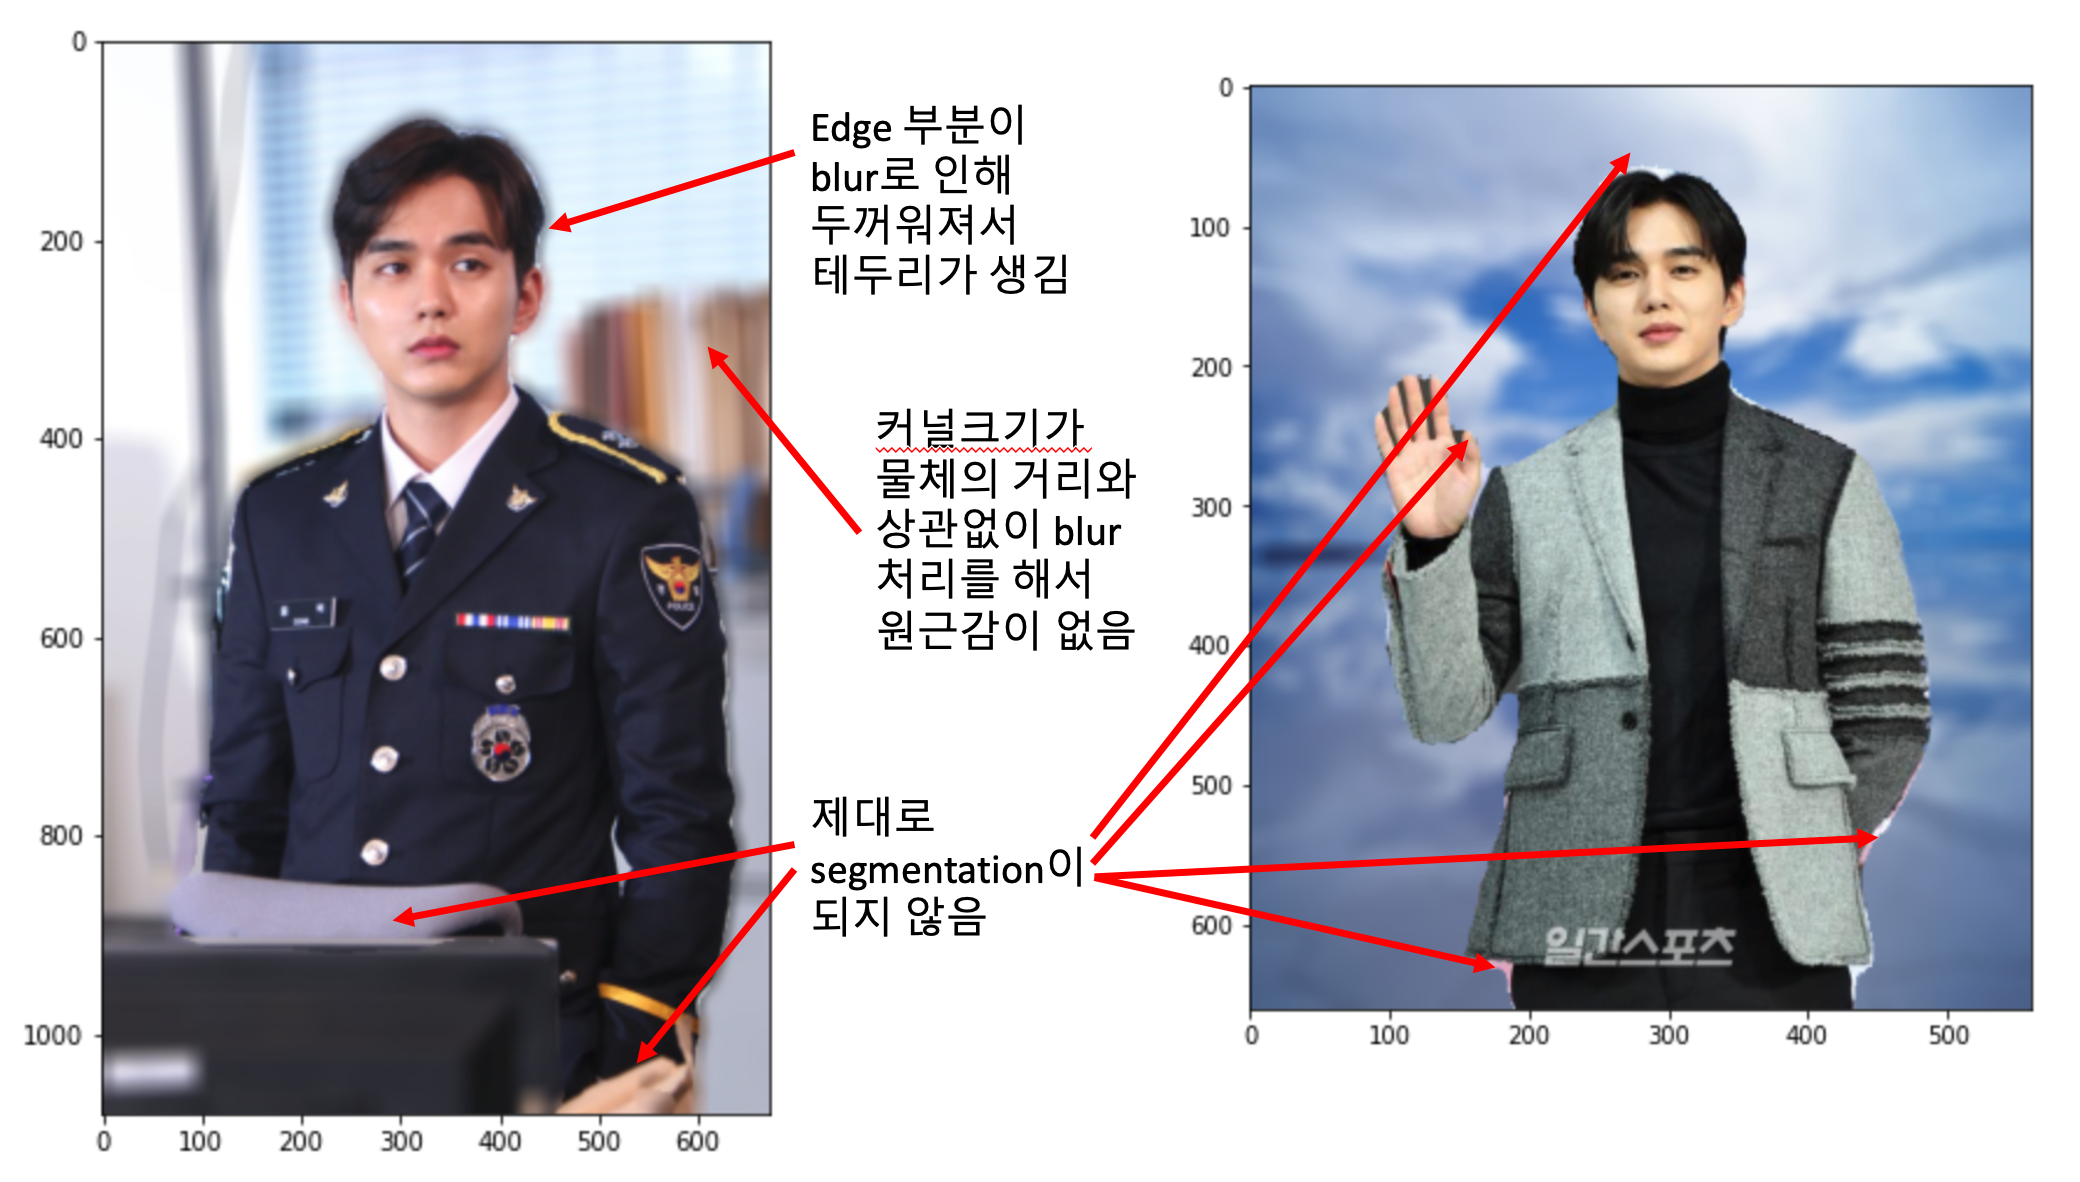

## Step 3. 해결 방법을 제안해 보기

- 세그멘테이션의 한계 : Semantic segmentation의 부정확성이 여러 가지 문제를 발생시키는 주요 원인입니다. 피사계심도를 이용한 보케(아웃포커싱) 효과는 말 그대로 심도를 표현하기 때문에 초점이 잡힌 거리를 광학적으로 아주 섬세하게 구별(segmentation) 하지만 이를 따라 한 semantic segmentation 모듈은 정확도가 1.00 이 되지 않는 한 완벽히 구현하기는 힘듭니다.

- 피사계 심도 이해하기
  - https://m.blog.naver.com/typs6301/222172333739
  - https://www.adobe.com/kr/creativecloud/photography/discover/shallow-depth-of-field.html

- 3D 카메라 활용하기
  - 이미지를 2D 방식으로 받아들이는 한계를 넘어 3D로 인식하려는 시도는 꽤 오래전부터 계속되어 왔습니다. 기술도 이제는 상당한 수준에 이르렀는데요. 크게는 스테레오 비전, ToF 방식 등이 자주 사용됩니다. 하드웨어 이미지 센서를 통한 3D 이미징 기술이 많이 발전되었는데요. 아래 참고 자료를 통해 최신 기술을 살펴봐도 좋습니다.
  - https://news.skhynix.co.kr/post/next-gen-3d

- 소프트웨어 기술 활용하기
  - 하드웨어 개발과 생산에는 비용이 많이 들기 때문에 제한된 하드웨어를 이용하면서 소프트웨어로 그 한계를 극복하려는 노력도 많습니다. 구글의 struct2Depth가 대표적인 예일 것 같습니다.
  - https://sites.google.com/view/struct2depth

- 다른 기술과 융합해 보기
  - https://ai.googleblog.com/2020/04/udepth-real-time-3d-depth-sensing-on.html

- 생기는 문제들의 근본은 결국 3차원의 형상을 2차원의 한장의 이미지에 담는데서 오는 문제점들이다. 소프트웨어 기술이 발달하고 있기는 하지만 한장의 이미지를 가지고 입체감을 담는 이미지를 표현한다는 것은 직관적으로 이해가 되진 않는다. 그게 가능하다면 눈이 두개가 아니어도 불편하지 않는 세상이 오는 것이 아닐까? 그렇다면 문제를 어떻게 해결할 수 있을까? 한장의 이미지가 아닌 여러장의 이미지를 바탕으로 심도를 표현할 수 있을 것 같다. 

  1) ToF 센서, 적외선, LIDAR 등을 이용해서 대상의 거리에 대한 정보를 받아 그 정보와 2차원의 이미지를 대응 시켜 한계들을 해결할 수 있을 것 같다. 

  2) 위의 방법은 추가적인 장비나 소스가 필요해서 조금 더 간단하게 사진을 다른 각도에서도 촬영하여 심도에 대한 정보를 계산하여 이미지에 담을 수 있을 것 같다. Computed tomography 가 대상을 180도 회전하여 라돈역변환 계산을 해서 3차원 reconstructed 이미지를 얻을 수 있는 것처럼 배경에 대한 정보도 여러장의 다른 각도에서 찍은 이미지를 바탕으로 러프하게 계산할 수 있지 않을까? 
  
    

## 회고

- Segmentation을 하는 과정 자체가 어려운 부분인 것 같은데 이미 학습된 모델과 데이터를 불러와서 적용시키는 것만 해서 아쉬운 부분이 있었다. 하지만 구현할 방법은 지금 단계에서 할 수 있는 것은 아닌 것 같다. 

- 문제점을 해결하는 방안을 구체적으로 적으라는 것이 어느 수준까지 어떻게 해야하는건지 이해가 안가서 생각하는데 시간이 많이 걸렸다. 

- Segmentation 작업을 연구소에서 수작업으로 몇년을 했어서 그런지 이번 주제에 대한 기대가 있었던 것 같다. 사람이나 고양이 책상 의자등을 잘 잡는 것을 보며.. 연구소에서 하던 수작업에 들인 시간들이 스쳐 지나갔다. 시료 분석이랑 방향이 달라서 모델들을 그대로 적용하진 못하겠지만... 남은 과정을 잘 배운다면 실험 데이터에서도 수작업 segmentation은 안해도 되지 않을까. 